In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Path = "retours_transactions_1.parquet" 
data = pd.read_parquet(Path)
data.head(5)

,Shop,Order_Date_FK,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup
0,36,20210730,-1968361059464632550,99.95,-2190786785520839526,23995792,0,74.96,36.534515,3694837121284491212,3162564956579801398,-453682476182549203
1,58,20210730,-1745497788861904687,21.95,-3499949798555834600,23995794,0,21.95,7.364523,-1657270726128381662,-6715310361529623819,-453682476182549203
2,49,20210730,-4482110002029860032,69.95,-7841417233849937172,23995797,0,38.47,24.415000,-7202472198306336051,-248459121805647149,5294166889150293396
3,49,20210730,-9146072753857637799,99.95,-7841417233849937172,23995797,0,54.97,32.293506,-2074012670196538378,-248459121805647149,5294166889150293396
4,15,20210730,-8829485741699345914,49.95,7033964597104594686,23995798,0,17.48,8.885632,-4869459690934553786,-4124706989267335995,-453682476182549203


<p style="text-align:center;"><strong>Overview of Dataset and Cleaning & EDA</strong></p>

In [4]:
data.describe()

,Shop,Order_Date_FK,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup
count,1.759889e+06,1.759889e+06,1.759889e+06,1.759889e+06,1.759889e+06,1.759889e+06,1.759889e+06,1.759889e+06,1.759889e+06,1.759889e+06,1.759889e+06,1.759889e+06
mean,4.914589e+01,2.021068e+07,-2.302661e+16,5.966566e+01,-1.309987e+17,2.377207e+07,3.852232e-02,4.902517e+01,2.049894e+01,-5.454867e+17,-5.450815e+17,2.489237e+17
std,2.983667e+01,6.698349e+01,5.336622e+18,3.206105e+01,5.367092e+18,1.929739e+05,1.924535e-01,2.646283e+01,1.341806e+01,5.479071e+18,4.006908e+18,2.507851e+18
min,1.000000e+00,2.021060e+07,-9.222763e+18,2.950000e+00,-9.223306e+18,2.343827e+07,0.000000e+00,0.000000e+00,-7.963912e+01,-9.188398e+18,-8.581611e+18,-5.386210e+18
25%,2.100000e+01,2.021062e+07,-4.524842e+18,3.995000e+01,-5.077521e+18,2.361243e+07,0.000000e+00,2.995000e+01,1.104375e+01,-4.445228e+18,-4.124707e+18,-4.536825e+17
50%,5.100000e+01,2.021070e+07,-1.096311e+17,5.995000e+01,-2.812411e+17,2.376311e+07,0.000000e+00,4.946000e+01,2.040411e+01,-1.657271e+18,-1.330987e+18,-4.536825e+17
75%,7.300000e+01,2.021072e+07,4.610997e+18,7.995000e+01,4.593722e+18,2.393783e+07,0.000000e+00,6.595000e+01,2.773386e+01,3.694837e+18,3.162565e+18,-4.536825e+17
max,1.030000e+02,2.021082e+07,9.222222e+18,2.500000e+02,9.223357e+18,2.411764e+07,1.000000e+00,2.500000e+02,1.064250e+03,9.213972e+18,8.676381e+18,7.941417e+18


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759889 entries, 0 to 1759888
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Shop                       int64  
 1   Order_Date_FK              int64  
 2   ProductCode                int64  
 3   OriginalSaleAmountInclVAT  float64
 4   CustomerID                 int64  
 5   SaleDocumentNumber         int64  
 6   Returned                   int64  
 7   RevenueInclVAT             float64
 8   CostPriceExclVAT           float64
 9   BrandName                  int64  
 10  ModelGroup                 int64  
 11  ProductGroup               int64  
dtypes: float64(3), int64(9)
memory usage: 161.1 MB


In [6]:
data.isnull().sum()

Shop                         0
Order_Date_FK                0
ProductCode                  0
OriginalSaleAmountInclVAT    0
CustomerID                   0
SaleDocumentNumber           0
Returned                     0
RevenueInclVAT               0
CostPriceExclVAT             0
BrandName                    0
ModelGroup                   0
ProductGroup                 0
dtype: int64

In [7]:
# Convert 'Order_Date_FK' column to datetime format
data['Order_Date_FK'] = pd.to_datetime(data['Order_Date_FK'], format='%Y%m%d')
data = data.rename(columns={'Order_Date_FK': 'Order_Date'})

# Round the 'CostPriceExclVAT' column to 2 decimal places
data['CostPriceExclVAT'] = data['CostPriceExclVAT'].round(2)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
# labels for values in 'Shop' column, if number of orders > 100 then 1 and number of orders <= 100 then 0
shop_location = lambda x: 1 if pd.notnull(x) and x > 100 else 0,
data['Shop'] = data['Shop'].apply(shop_location)
# data.head()

In [10]:
# Find outliers in CostPriceExclVAT and OriginalSaleAmountInclVAT columns
max_value = data['CostPriceExclVAT'].max()
sorted_df1 = data[(data['CostPriceExclVAT'] > 100) & (data['CostPriceExclVAT'] < max_value)].sort_values(by='CostPriceExclVAT', ascending=False)
sorted_df1[['OriginalSaleAmountInclVAT', 'CostPriceExclVAT']].head()

,OriginalSaleAmountInclVAT,CostPriceExclVAT
593349,110.0,480.28
1205796,250.0,105.63
163358,240.0,101.30
439528,250.0,100.57


In [11]:
# Drop outliers in CostPriceExclVAT and OriginalSaleAmountInclVAT columns
data.drop(data[(data["CostPriceExclVAT"] < -10) | (data["CostPriceExclVAT"] > 400)].index, inplace=True)
data.reset_index(drop=True, inplace=True)

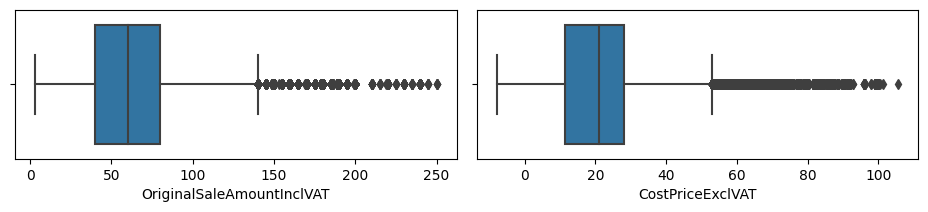

In [12]:
# Boxplots to identify outliers in the columns
columns_to_plot = ['OriginalSaleAmountInclVAT', 'CostPriceExclVAT']
plt.figure(figsize=(14, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[column])

plt.tight_layout()
plt.show()

In [13]:
data['CostPriceExclVAT'].describe()

count    943306.000000
mean         20.990365
std          12.362259
min          -7.920000
25%          11.540000
50%          20.890000
75%          28.120000
max         105.630000
Name: CostPriceExclVAT, dtype: float64

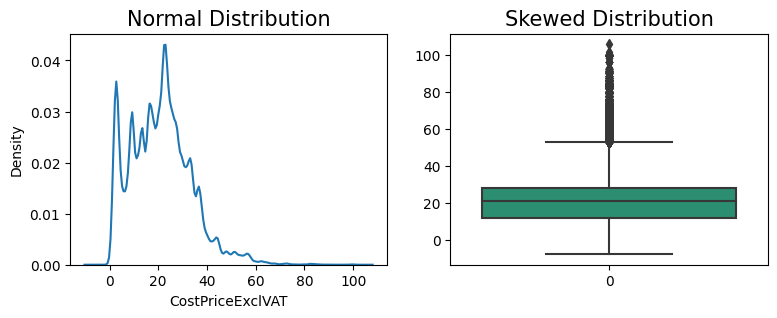

In [14]:
# Visualizing normal and skewed distributions
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.title("Normal Distribution", fontsize=15)
sns.kdeplot(data = data["CostPriceExclVAT"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = data["CostPriceExclVAT"], palette="Dark2")
plt.show()

In [15]:
print("We still have", data.shape[0], "rows")

We still have 943306 rows


Sounds good :)

Let's visualize the data to know more about the data and correlations between variables.

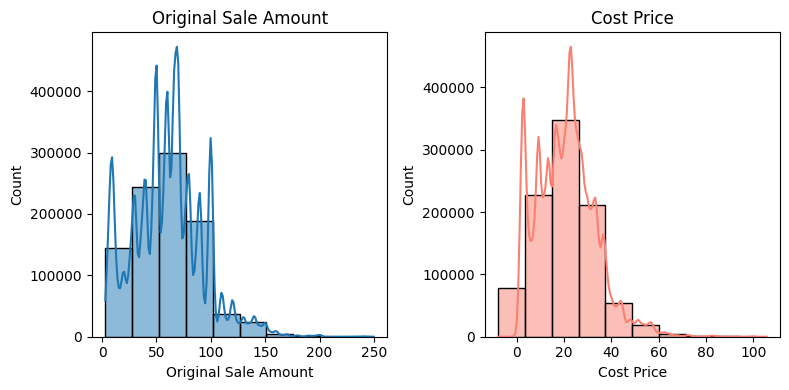

In [16]:
# Histograms of CostPriceExclVAT and OriginalSaleAmountInclVAT
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=data, x='OriginalSaleAmountInclVAT', bins=10, kde=True, ax=axes[0])
axes[0].set_title('Original Sale Amount')
axes[0].set_xlabel('Original Sale Amount')
sns.histplot(data=data, x='CostPriceExclVAT', bins=10, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Cost Price')
axes[1].set_xlabel('Cost Price')
plt.tight_layout()
plt.show()

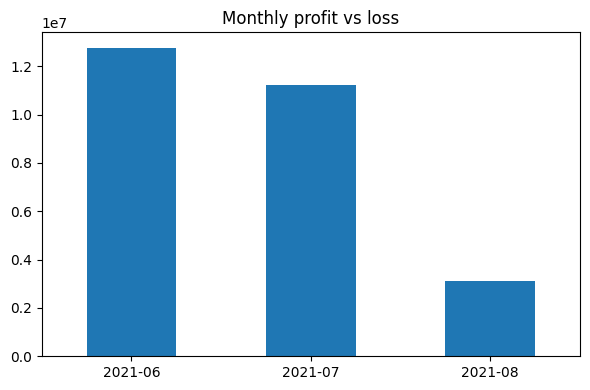

In [17]:
# Monthly profit and loss
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Month_Year'] = data['Order_Date'].dt.to_period('M')
data['Profit_Loss'] = data['RevenueInclVAT'] - data['CostPriceExclVAT']
monthly_profit_loss = data.groupby('Month_Year')['Profit_Loss'].sum()

plt.figure(figsize=(6, 4))
monthly_profit_loss.plot(kind='bar')
plt.title('Monthly profit vs loss')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

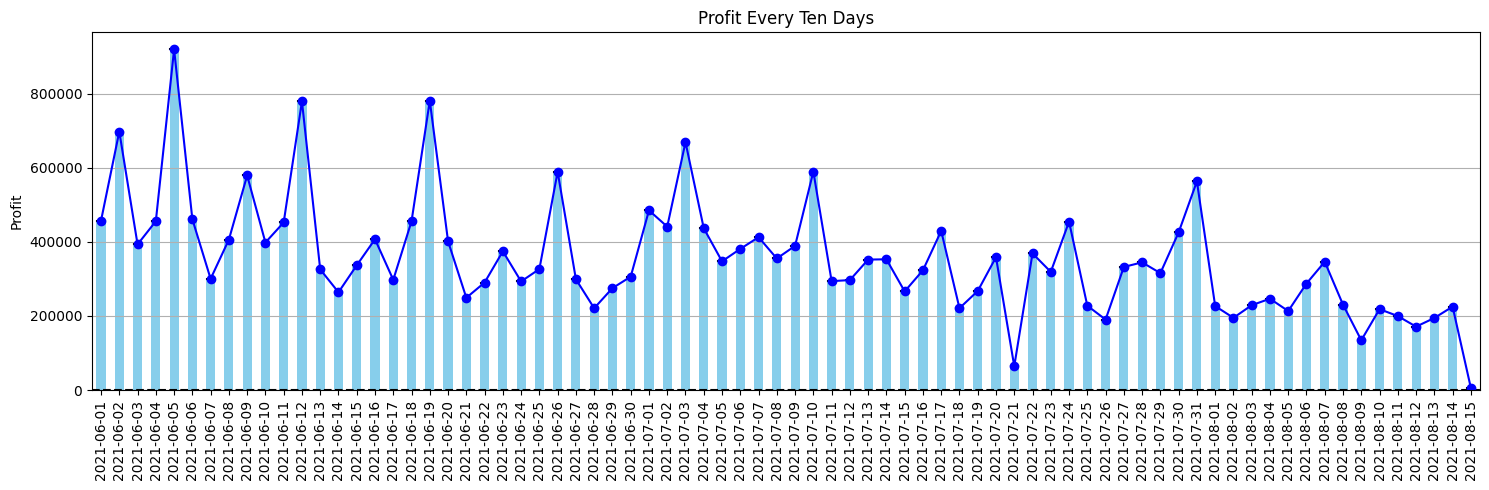

In [18]:
# Daily profit and loss
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Day_Month'] = data['Order_Date'].dt.to_period('10D')
data['Profit_Loss'] = data['RevenueInclVAT'] - data['CostPriceExclVAT']
profit_df = data[data['RevenueInclVAT'] > data['CostPriceExclVAT']]

# Group by day and month and sum the profit/loss
daily_profit = profit_df.groupby('Day_Month')['Profit_Loss'].sum()
plt.figure(figsize=(15, 5))
daily_profit.plot(kind='bar', color='skyblue') 
plt.title('Profit Every Ten Days')
plt.xlabel('')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.grid(axis='y')

for i, value in enumerate(daily_profit):
    plt.plot([i - 0.2, i + 0.2], [value, value], color='black')

plt.axhline(y=0, color='black', linestyle='--') 
plt.plot(daily_profit.index.astype(str), daily_profit.values, marker='o', linestyle='-',
         color='blue') 

plt.tight_layout()
plt.show()

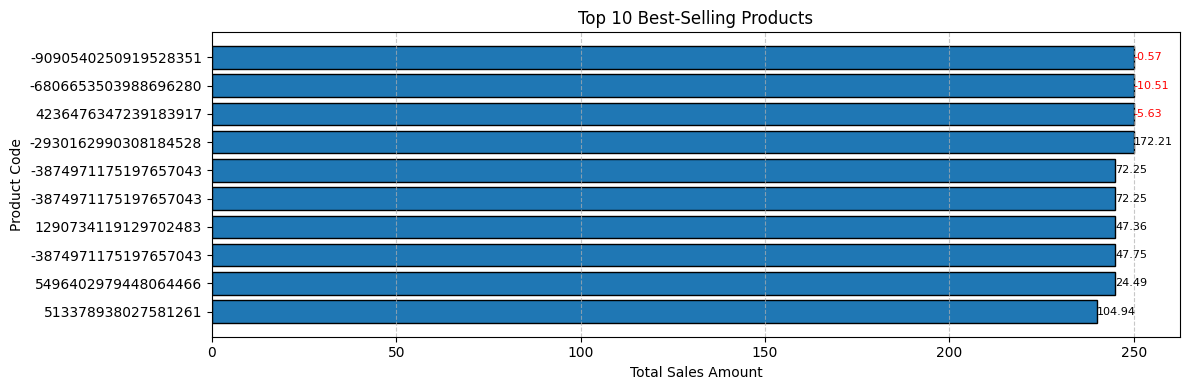

In [19]:
# Visualize the top 10 best-selling products
df_sorted = data.sort_values(by='OriginalSaleAmountInclVAT', ascending=False)
top_10 = df_sorted.head(10).copy()
top_10['Profit'] = top_10['RevenueInclVAT'] - top_10['CostPriceExclVAT']

# Plot the top 10 best-selling products
plt.figure(figsize=(12, 4))
bars = plt.barh(range(len(top_10)), top_10['OriginalSaleAmountInclVAT'], edgecolor='black')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Code')
plt.title('Top 10 Best-Selling Products')
plt.yticks(range(len(top_10)), [str(code) for code in top_10['ProductCode']])  
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7) 

# we add profit values inside the bars with different colors and font sizes
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{top_10.iloc[i]["Profit"]:,.2f}', 
             va='center', ha='left', fontsize=8, color='black' if top_10.iloc[i]['Profit'] >= 0 else 'red')

plt.tight_layout()
plt.show()

Negative profit values indicate that the cost of the product exceeded the revenue generated from its sales. In other words, it means that selling the product resulted in a loss rather than a profit. 

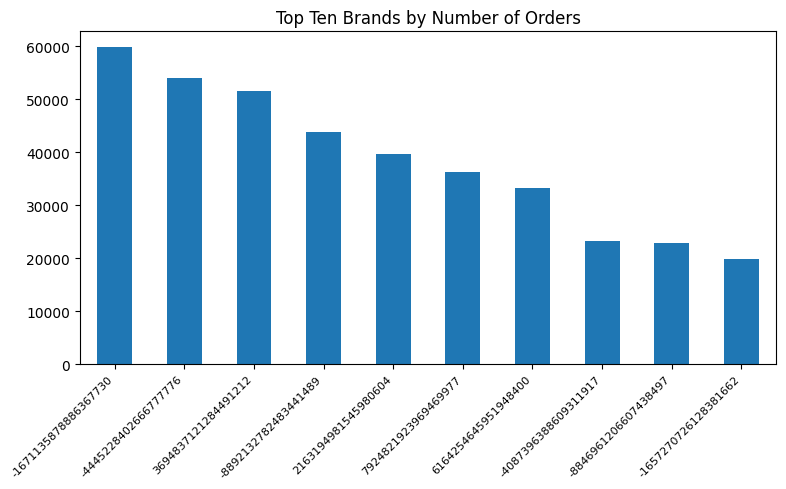

In [20]:
# Top ten brands
top_n_brands = 10  # Number of top brands to consider
most_requested_brands = data.groupby('BrandName').size().nlargest(top_n_brands)

# Plotting
plt.figure(figsize=(8, 5))
most_requested_brands.plot(kind='bar')
plt.title('Top Ten Brands by Number of Orders')
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

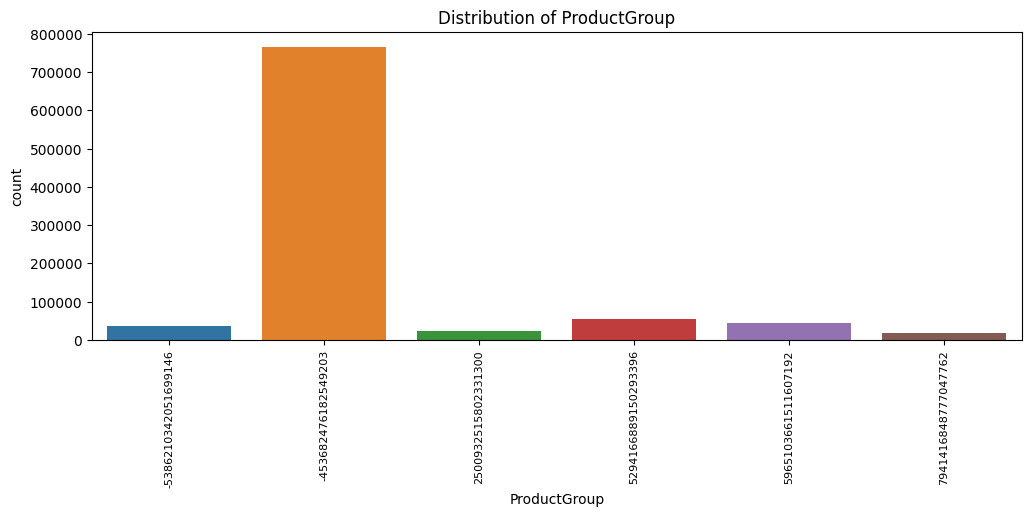

In [21]:
# Bar plot showing the distribution of ProductGroup
plt.figure(figsize=(12, 4))
sns.countplot(x='ProductGroup', data= data)
plt.title('Distribution of ProductGroup')
plt.xticks(rotation=90, size=8)
plt.show()

There are brands that are in high transactions.

In [22]:
# we make a lambda function to determine the reason for return and create the 'Reason_for_Return' column
data['Reason_for_Return'] = data.apply(lambda row: 'Discount' if row['Returned'] == 1 and row['OriginalSaleAmountInclVAT'] > row['RevenueInclVAT'] else 
                                           ('Overcharged' if row['Returned'] == 1 and row['OriginalSaleAmountInclVAT'] < row['RevenueInclVAT'] else 
                                           ('Other' if row['Returned'] == 1 else 'Not Returned')), axis=1)
# data.head(5)

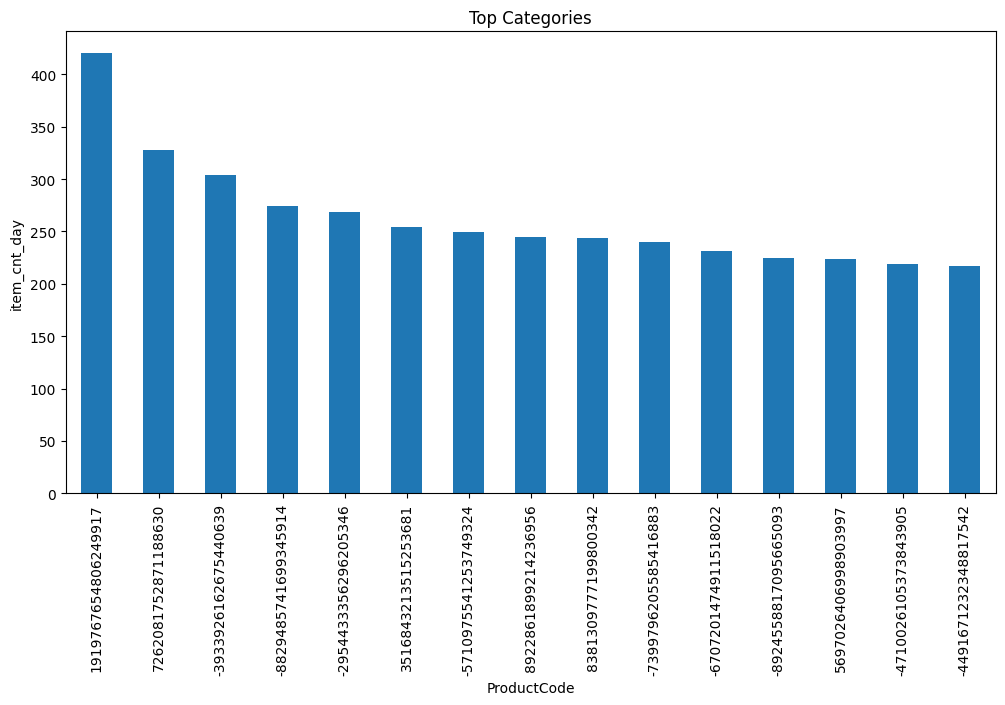

In [23]:
# top categories item_cnt_day
plt.figure(figsize=(12,6))
plt.title('Top Categories')
plt.ylabel('item_cnt_day')
data.groupby('ProductCode')['Shop'].sum().sort_values(ascending=False)[0:15]
data.groupby('ProductCode')['Shop'].sum().sort_values(ascending=False)[0:15].plot(kind='bar')
plt.show()

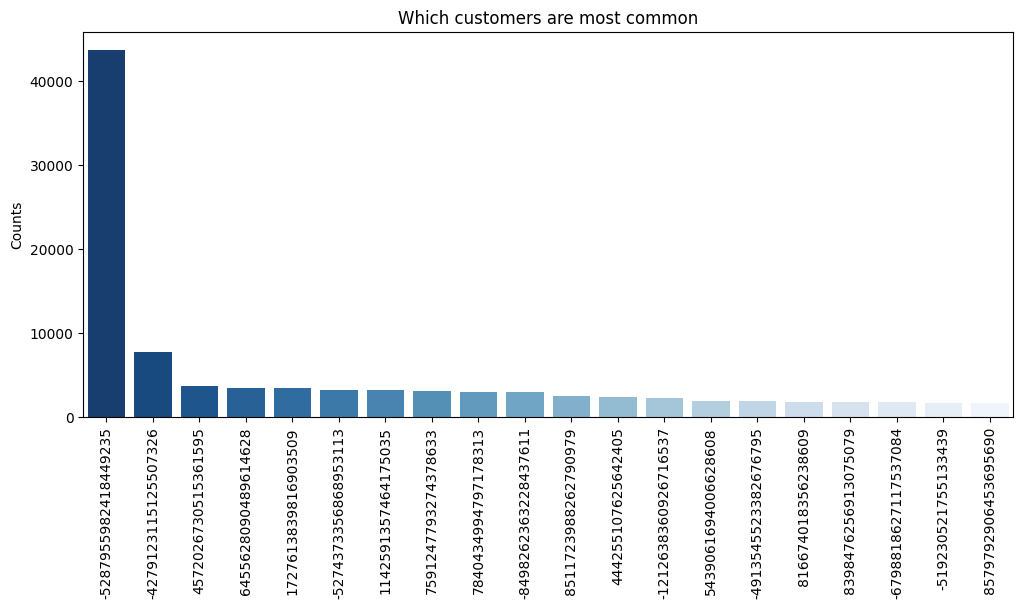

In [24]:
# Plot the top 20 customers
customer_counts = data['CustomerID'].value_counts().sort_values(ascending=False).iloc[0:20] 

plt.figure(figsize=(12, 5))
sns.barplot(x=customer_counts.index, y=customer_counts.values, order=customer_counts.index, palette="Blues_r")
plt.ylabel("Counts")
plt.xlabel("")
plt.title("Which customers are most common")
plt.xticks(rotation=90)
plt.show()

In [25]:
# Group sales data by month and calculate total revenue for each month
monthly_revenue = data.groupby(data['Order_Date'].dt.to_period('M'))['RevenueInclVAT'].sum()
monthly_revenue

Order_Date
2021-06    20801213.73
2021-07    20377784.82
2021-08     5710758.48
Freq: M, Name: RevenueInclVAT, dtype: float64

In [26]:
# Analyze shop performance
shop_performance = data.groupby('Shop').agg({'RevenueInclVAT': 'sum', 'CostPriceExclVAT': 'sum'})
shop_performance.head()

,RevenueInclVAT,CostPriceExclVAT
Shop,,
0,38839167.59,16116861.77
1,8050589.44,3683475.49


<Figure size 1000x600 with 0 Axes>

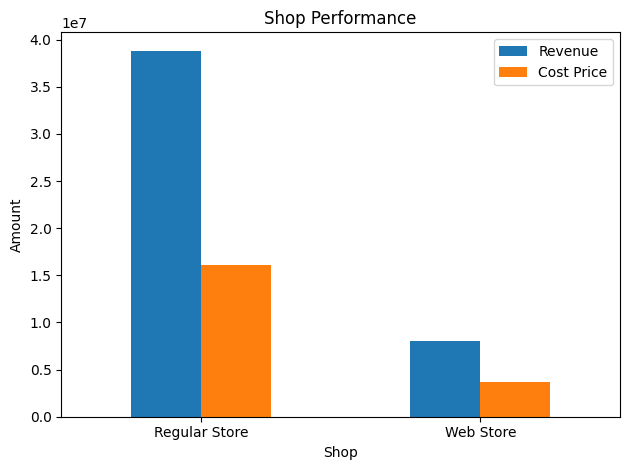

In [26]:
# Plot Shop Performance
labels = ['Regular Store', 'Web Store']
plt.figure(figsize=(10, 6))
shop_performance.plot(kind='bar', rot=0)
plt.title('Shop Performance')
plt.xlabel('Shop')
plt.ylabel('Amount')
plt.xticks(range(len(labels)), labels)
plt.xticks(rotation=0)
plt.legend(["Revenue", "Cost Price"])
plt.tight_layout()
plt.show()

It seems that the company is experiencing a significant growth in revenue.

In [27]:
# Now let's analyze customer behavior
customer_behavior = data.groupby('CustomerID').agg({'RevenueInclVAT': 'sum', 'CostPriceExclVAT': 'sum', 'Returned': 'mean'})
sorted_customers = customer_behavior.sort_values(by='Returned', ascending=False)
sorted_customers.nunique()

RevenueInclVAT      42304
CostPriceExclVAT    29296
Returned              212
dtype: int64

In [28]:
# total revenue, total cost, and return rate for each customer
customer_behavior = data.groupby('CustomerID').agg({
    'RevenueInclVAT': 'sum', 
    'CostPriceExclVAT': 'sum', 
    'Returned': 'mean'
})

# net profit for each customer
customer_behavior['NetProfit'] = customer_behavior['RevenueInclVAT'] - customer_behavior['CostPriceExclVAT']
print("Top 5 Customers by Total Revenue:")
print(customer_behavior.sort_values(by='RevenueInclVAT', ascending=False).head(5))

Top 5 Customers by Total Revenue:
                      RevenueInclVAT  CostPriceExclVAT  Returned   NetProfit
CustomerID                                                                  
-5287955982418449235      2542103.16        1128588.83  0.143936  1413514.33
-4279123115125507326       304566.95         208854.72  0.022111    95712.23
 1727613839816903509       207837.10          93656.40  0.128861   114180.70
 1142591357464175035       204955.57          95017.41  0.020459   109938.16
 6455628090489614628       184086.98          77769.29  0.020821   106317.69


In [29]:
# sort net profit for each customer
print("Top 5 Customers by Net Profit:")
print(customer_behavior.sort_values(by='NetProfit', ascending=False).head(5))

Top 5 Customers by Net Profit:
                      RevenueInclVAT  CostPriceExclVAT  Returned   NetProfit
CustomerID                                                                  
-5287955982418449235      2542103.16        1128588.83  0.143936  1413514.33
 1727613839816903509       207837.10          93656.40  0.128861   114180.70
 1142591357464175035       204955.57          95017.41  0.020459   109938.16
 4572026730515361595       182070.06          75345.35  0.029955   106724.71
 6455628090489614628       184086.98          77769.29  0.020821   106317.69


<p style="text-align:center;"><strong>Return Products</strong></p>

- First, we need to see why the product is being sent back. We should break down the problem into smaller pieces and analyze them,<br>
Then, we can put them all to together and understand what is causing the issue.

In [30]:
# Create a new column "Reason_for_Return" based on "Returned" and "OriginalSaleAmountInclVAT"
data['Reason_for_Return'] = data.apply(lambda row: 'Discount' if row['Returned'] == 1 and row['OriginalSaleAmountInclVAT'] > row['RevenueInclVAT']\
        else ('Overcharged' if row['Returned'] == 1 and row['OriginalSaleAmountInclVAT'] < row['RevenueInclVAT']\
        else ('Other' if row['Returned'] == 1 else 'Not Returned')), axis=1)
# data.head(5)

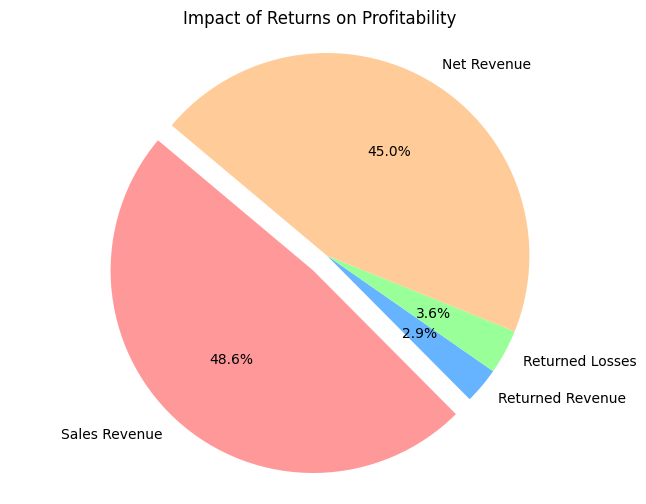

In [31]:
# concise visualizes the impact of returns on profitability
returned_products = data[data['Returned'] == 1]

# we collect the following metrics to visualize
returned_losses = max(0, returned_products['OriginalSaleAmountInclVAT'].sum())
returned_revenue = max(0, returned_products['RevenueInclVAT'].sum())
sales_revenue = max(0, data[data['Returned'] == 0]['RevenueInclVAT'].sum())
net_revenue = max(0, sales_revenue - returned_losses)

# Visualize the impact of returns on profitability
labels = ['Sales Revenue', 'Returned Revenue', 'Returned Losses', 'Net Revenue']
sizes = [sales_revenue, returned_revenue, returned_losses, net_revenue]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Impact of Returns on Profitability')
plt.show()

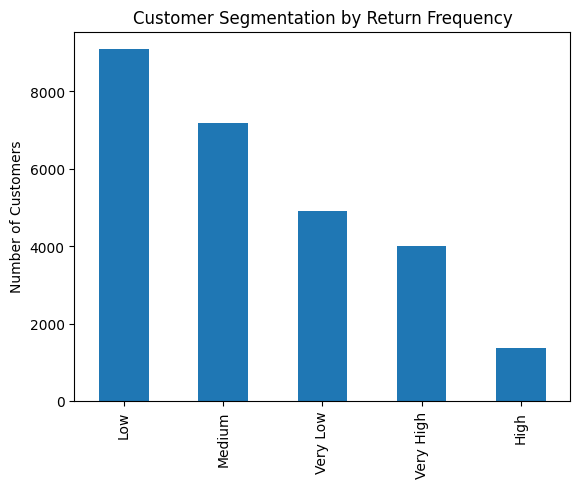

In [32]:
# Segment customers based on return frequency
customer_return_frequency = data.groupby('CustomerID')['Returned'].mean()
customer_segment = pd.cut(customer_return_frequency, bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
customer_segment.value_counts().plot(kind='bar')
plt.title('Customer Segmentation by Return Frequency')
plt.xlabel('')
plt.ylabel('Number of Customers')
plt.show()

In [48]:
# Segmentation by CustomerID and Reason_for_Return to can use customer behavior to segment customers
customer_segmentation = data.groupby(['CustomerID', 'Reason_for_Return']).size().unstack(fill_value=0)
customer_segmentation.head()

Reason_for_Return,Discount,Not Returned,Other
CustomerID,,,
-9223305730135950055,0,6,0
-9223285571620612195,0,3,0
-9223154717149953047,1,1,0
-9223150233787986914,0,2,0
-9223112517878189876,0,1,0


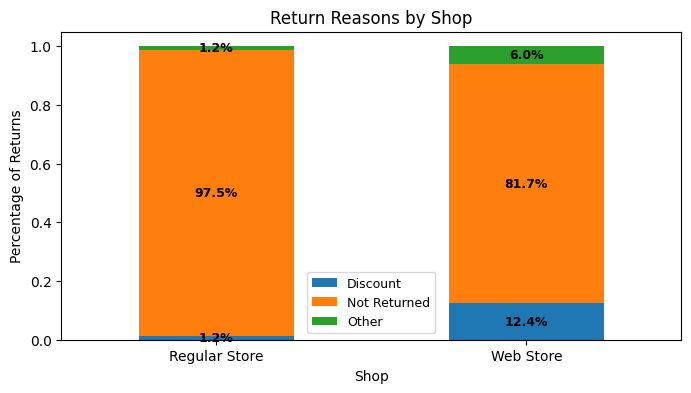

In [34]:
# Bar plot of return reasons by shop to give an idea of the distribution of returns
df = data.dropna(subset=['Shop'])
return_stats = df.groupby('Shop')['Reason_for_Return'].value_counts(normalize=True).unstack()
ax = return_stats.plot(kind='bar', stacked=True, figsize=(8, 4))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(height), (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=9, color='black', fontweight='bold')

plt.title('Return Reasons by Shop')
plt.xlabel('Shop')
plt.ylabel('Percentage of Returns')
plt.xticks(range(len(return_stats.index)), ['Regular Store', 'Web Store'], rotation=0)
plt.legend(fontsize=9, title_fontsize=9)
plt.show()

As we see, the vast majority of sales occurred in regular shops.

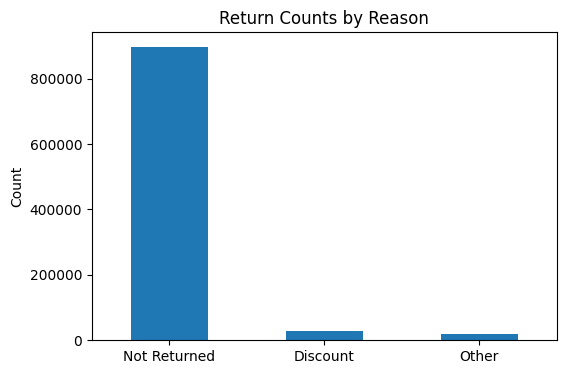

In [35]:
# Plot the distribution of 'Reason_for_Return'
plt.figure(figsize=(6, 4))
data['Reason_for_Return'].value_counts().plot(kind='bar')
plt.title('Return Counts by Reason')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The most frequent reason for a return is "Discount" and "other". <br>
The 'other' mean for example is an issue with the purchasing process or overcharge.

In [36]:
# Trend Analysis of Returns by Reason for Return for detecting trends 
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
trend_analysis = data.groupby(['Month_Year', 'Reason_for_Return']).size().unstack(fill_value=0)
trend_analysis

Reason_for_Return,Discount,Not Returned,Other
Month_Year,,,
2021-06,9080,379186,13007
2021-07,15901,400263,4594
2021-08,2812,117466,997


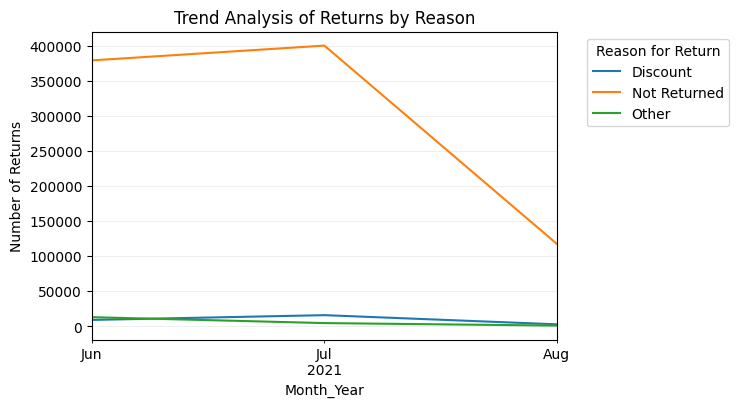

In [37]:
# Line plot of trend analysis
trend_analysis.plot(kind='line', figsize=(6, 4))
plt.title('Trend Analysis of Returns by Reason')
plt.xlabel('Month_Year')
plt.ylabel('Number of Returns')
plt.legend(title='Reason for Return', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)
plt.show()

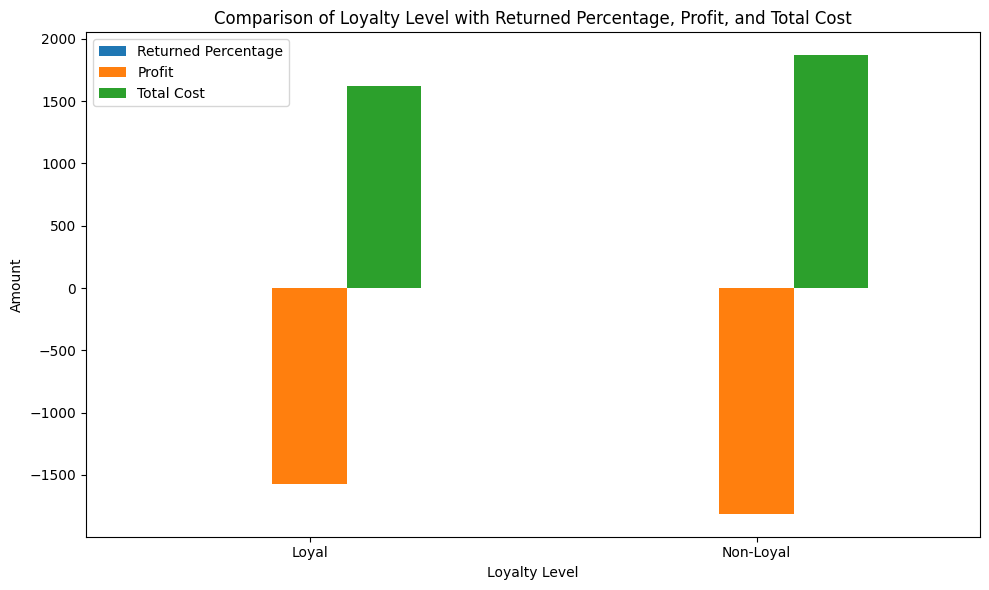

In [38]:
# visualize the comparison of loyalty levels with returned percentage, profit, and total cost for each customer

# First, we need to calculate the total cost and profit for each customer
data['Total_Cost'] = (data['CostPriceExclVAT'] * data['OriginalSaleAmountInclVAT']).round(2)
data['Profit'] = data['RevenueInclVAT'] - data['Total_Cost']

# Then, we will calculate returned percentage
data['Returned_Percentage'] = (data['Returned'] / data['OriginalSaleAmountInclVAT'] * 100).round(2)

# We need to calculate the Loyalty_Level column based on your criteria
customer_frequency = data['CustomerID'].value_counts()
loyal_customers = customer_frequency[customer_frequency > 1].index
data['Loyalty_Level'] = data['CustomerID'].apply(lambda x: 'Loyal' if x in loyal_customers else 'Non-Loyal')

# Check for NaN values and fill them with the mean in a single step
data[['Returned_Percentage', 'Profit', 'Total_Cost']] = \
    data[['Returned_Percentage', 'Profit', 'Total_Cost']].fillna(data[['Returned_Percentage', 'Profit', 'Total_Cost']].mean())

# Group by Loyalty Level and calculate mean for Returned Percentage, Profit, and Total Cost
loyalty_grouped = data.groupby('Loyalty_Level')[['Returned_Percentage', 'Profit', 'Total_Cost']].mean()

loyalty_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Loyalty Level with Returned Percentage, Profit, and Total Cost')
plt.xlabel('Loyalty Level')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(["Returned Percentage", "Profit", "Total Cost"])
plt.tight_layout()
plt.show()

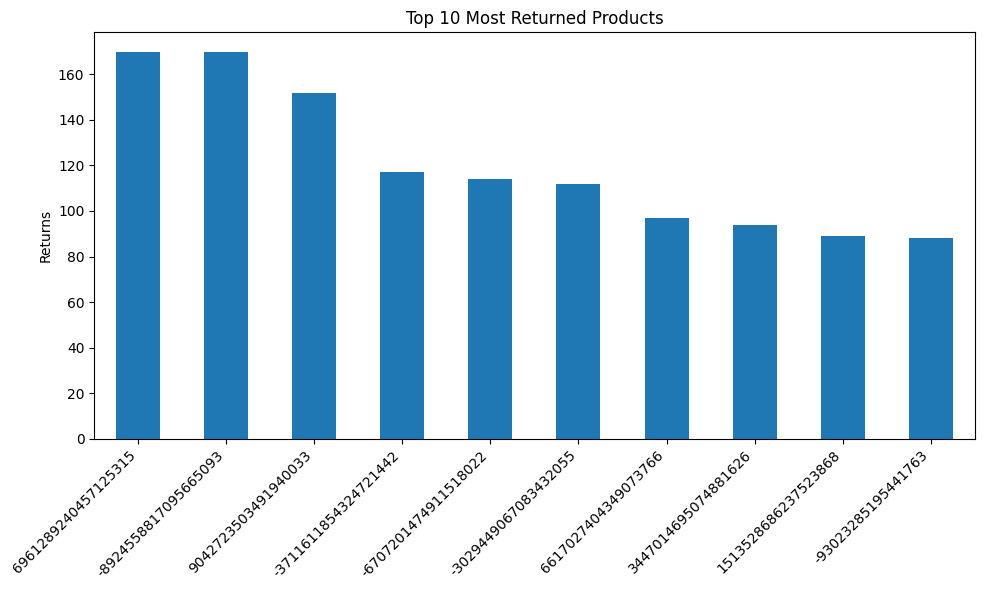

In [39]:
# We will calculate the top 10 most returned products
def calculate_most_returned_products(data, top_n=10):
    returns_count = data[data['Returned'] == 1].groupby('ProductCode').size()     # Group data by ProductCode and count the number of returns
    returns_count = returns_count.sort_values(ascending=False)
    most_returned_products = returns_count.head(top_n)                            # Get the top n most returned products
    return most_returned_products

def plot_most_returned_products(data, top_n=10):
    most_returned_products = calculate_most_returned_products(data, top_n)

    plt.figure(figsize=(10, 6))
    most_returned_products.plot(kind='bar')
    plt.title('Top {} Most Returned Products'.format(top_n))
    plt.xlabel('')
    plt.ylabel('Returns')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_n = 10
plot_most_returned_products(data, top_n)

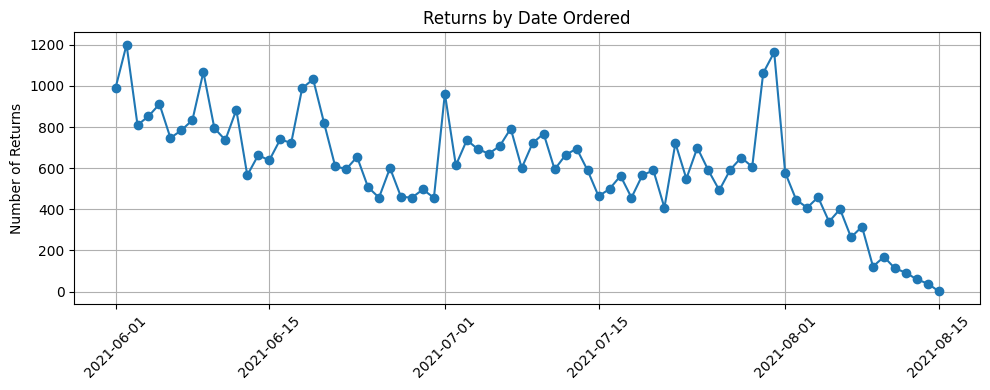

In [40]:
# Plot the number of returns by date
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
returns_by_date = data.groupby('Order_Date')['Returned'].sum().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(returns_by_date['Order_Date'], returns_by_date['Returned'], marker='o', linestyle='-')
plt.title('Returns by Date Ordered')
plt.xlabel('')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# Data Preparation, add new columns "Total Revenue" and "Total Cost" and "Profit" for revenue per customer
data['Profit'] = data['OriginalSaleAmountInclVAT'] - data['CostPriceExclVAT']

revenue_per_customer = data.groupby('CustomerID')['OriginalSaleAmountInclVAT'].mean().round(2).reset_index()
revenue_per_customer.columns = ['CustomerID', 'Revenue_per_Customer']
data = pd.merge(data, revenue_per_customer, on='CustomerID', how='left')

In [42]:
# Drop unnecessary columns
data.drop(['Month_Year', 'Day_Month'], axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)

In [43]:
# Save the modified DataFrame to a new CSV file
data.to_csv('New_with_columns.csv', index=False)

<p style="text-align:center;"><strong>ML Model</strong></p>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# df = data.copy()                  # 1. Read the CSV file OR.....
# df.head(5)                                                    

In [62]:
PATH = 'New_with_columns.csv'       # 2. .....Load data from CSV
df = pd.read_csv(PATH)
df.head(5)

,Shop,Order_Date,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup,Profit_Loss,Reason_for_Return,Total_Cost,Profit,Returned_Percentage,Loyalty_Level,Revenue_per_Customer
0,0,2021-07-30,-1968361059464632550,99.95,-2190786785520839526,23995792,0,74.96,36.53,3694837121284491212,3162564956579801398,-453682476182549203,38.43,Not Returned,3651.17,63.42,0.0,Non-Loyal,99.95
1,0,2021-07-30,-1745497788861904687,21.95,-3499949798555834600,23995794,0,21.95,7.36,-1657270726128381662,-6715310361529623819,-453682476182549203,14.59,Not Returned,161.55,14.59,0.0,Loyal,33.95
2,0,2021-07-30,-4482110002029860032,69.95,-7841417233849937172,23995797,0,38.47,24.42,-7202472198306336051,-248459121805647149,5294166889150293396,14.05,Not Returned,1708.18,45.53,0.0,Loyal,97.46
3,0,2021-07-30,-9146072753857637799,99.95,-7841417233849937172,23995797,0,54.97,32.29,-2074012670196538378,-248459121805647149,5294166889150293396,22.68,Not Returned,3227.39,67.66,0.0,Loyal,97.46
4,0,2021-07-30,-8829485741699345914,49.95,7033964597104594686,23995798,0,17.48,8.89,-4869459690934553786,-4124706989267335995,-453682476182549203,8.59,Not Returned,444.06,41.06,0.0,Loyal,52.46


In [63]:
# Convert 'Order_Date' column to datetime format and create new columns for day, month, and year
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Day'] = df['Order_Date'].dt.day
df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year

# Encode categorical variables for correlation analysis
encoder = LabelEncoder()
df['Reason_for_Return_Encoded'] = encoder.fit_transform(df['Reason_for_Return'])
df['Loyalty_Level_Encoded'] = encoder.fit_transform(df['Loyalty_Level'])

df.drop(columns=['Reason_for_Return', 'Loyalty_Level', 'Year'], inplace=True)
df.reset_index(drop=True, inplace=True)

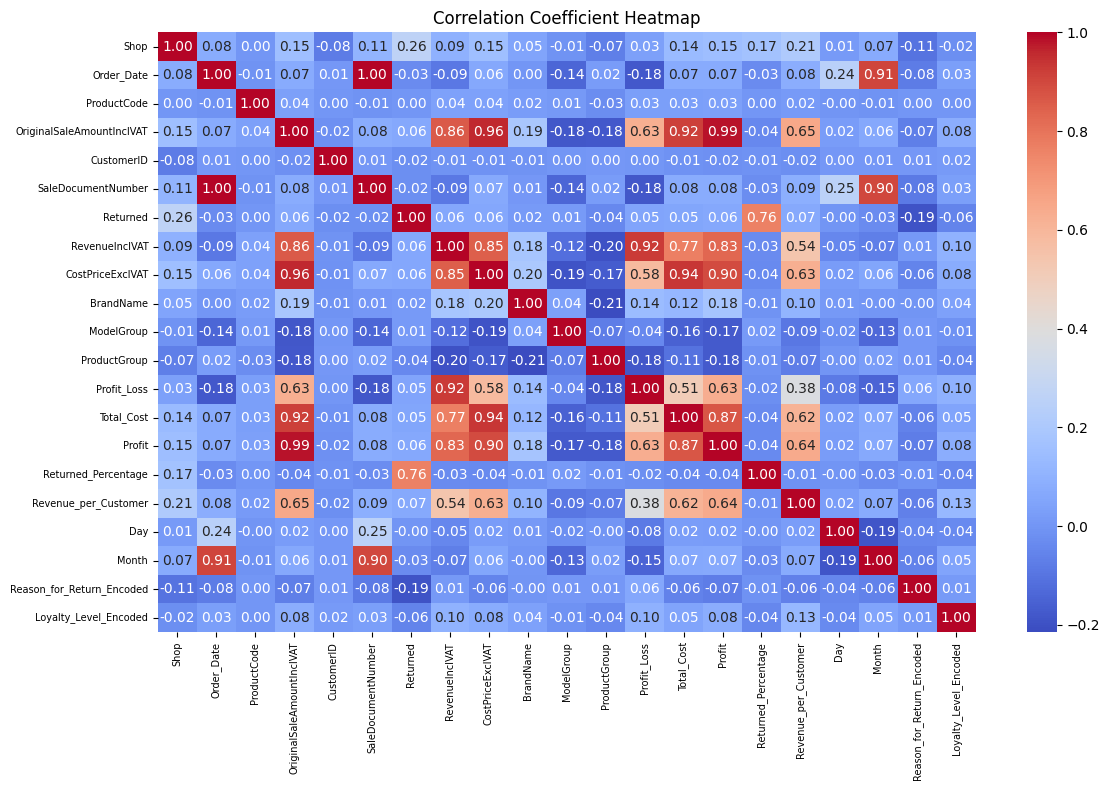

In [64]:
# Correlation matrix for selected columns to see if there is any correlation
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Coefficient Heatmap')
plt.xticks(rotation=90, size=7) 
plt.yticks(rotation=0, size=7)
plt.tight_layout()
plt.show()

* As we see in the correlation matrix, there is a correlation not so very high! but it is good, enough for our model.

* So i will use them in my model.

* OriginalSaleAmountInclVAT, RevenueInclVAT, CostPriceExclVAT, Profit, Returned_Percentage, Revenue_per_Customer

In [66]:
# I choose to use Random Forest Classifier and XGBoost Classifier because they have high accuracy for this dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier

relevant_columns = ['OriginalSaleAmountInclVAT', 'RevenueInclVAT', 'CostPriceExclVAT', 'Profit',
                    'Returned_Percentage', 'Revenue_per_Customer', 'Returned']

df = df[relevant_columns]
df.dropna(inplace=True)

X = df.drop(columns=['Returned'])
y = df['Returned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=1000, max_depth=8, min_samples_split=400, min_samples_leaf=300, random_state=42)
xgb = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
print("Random Forest AUC:", rf_auc)
print("XGBoost AUC:", xgb_auc)

best_model = rf if rf_auc > xgb_auc else xgb
ensemble = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')
ensemble.fit(X_train, y_train)
ensemble_auc = roc_auc_score(y_test, ensemble.predict_proba(X_test)[:, 1])
print("Ensemble AUC:", ensemble_auc)

unknown_pred = best_model.predict_proba(X_test)[:, 1]
prediction = pd.DataFrame({'order_item_id': X_test.index, 'return': unknown_pred})
# prediction.to_csv("prediction_final.csv", index=False)

Random Forest AUC: 1.0
XGBoost AUC: 1.0
Ensemble AUC: 1.0


In [67]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# We will use cross-validation to evaluate the model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
y_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
conf_matrix = confusion_matrix(y_train, (y_pred_cv > 0.5))

# Calculate precision, recall, and F1-score
precision = precision_score(y_train, (y_pred_cv > 0.5))
recall = recall_score(y_train, (y_pred_cv > 0.5))
f1 = f1_score(y_train, (y_pred_cv > 0.5))

print("Cross-Validation ROC AUC:", cv_scores.mean())
print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Cross-Validation ROC AUC: 1.0
Confusion Matrix:
[[717529      0]
 [     0  37115]]
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


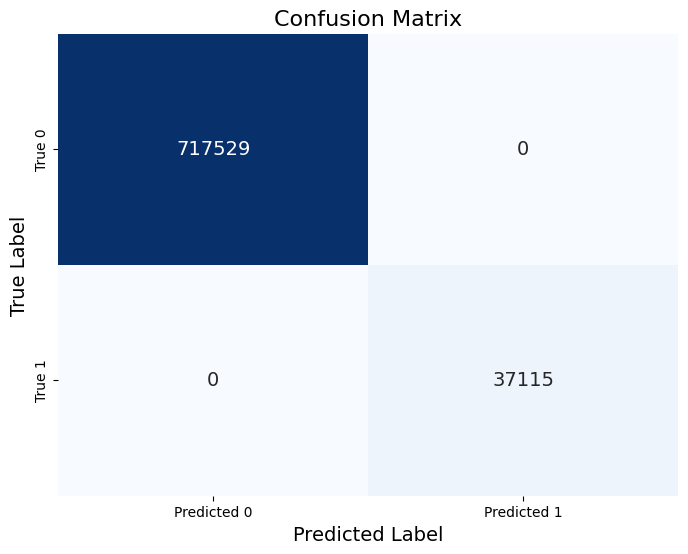

In [68]:
# Confusion matrix data
conf_matrix_data = np.array([[717529, 0], [0, 37115]])

# Precision, recall, and F1-score data
precision = 1.0
recall = 1.0
f1_score = 1.0

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_data, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(np.arange(2) + 0.5, ['Predicted 0', 'Predicted 1'])
plt.yticks(np.arange(2) + 0.5, ['True 0', 'True 1'])
plt.show()

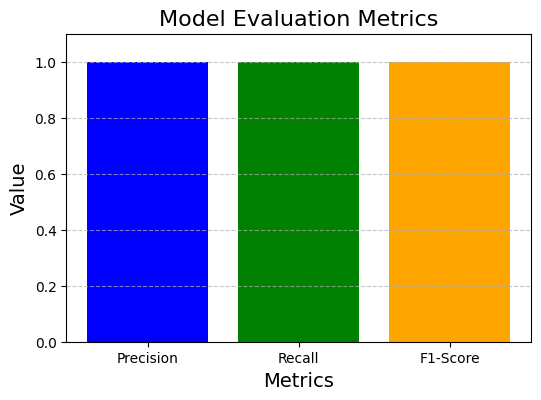

In [69]:
# Plot precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Model Evaluation Metrics', fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()